In [ ]:
!pip install -q kaggle

In [ ]:
# These are some groundbreaking CNN architectures that were proposed to achieve a better accuracy and to reduce the computational cost .

In [3]:
import tensorflow as tf


In [4]:

import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

In [26]:
train_directory="/content/dataset/Emotions Dataset/Emotions Dataset/train"
# validation_directory="/content/dataset/Emotions Dataset/Emotions Dataset/test"
val_directory="/content/dataset/Emotions Dataset/Emotions Dataset/test"

CLASS_NAMES=["angry","happy","sad"]
CONFIGURATION={
    "BATCH_SIZE":32,
    "IM_SIZE":256,
    "LEARNING_RATE":0.001,
    "N_EPOCHS":20,
    "DROPOUT_RATE":0.0,
    "REGULARIZATION_RATE":0.0,
    "N_FILTERS":6,
    "KERNEL_SIZE":3,
    "N_STRIDES":1,
    "POOL_SIZE":2,
    "N_DENSE_1":100,
    "N_DENSE_2":10, #no.of o/p in other dense layer
    "NUM_CLASSES":3,
}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

# kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

 97% 299M/309M [00:04<00:00, 35.7MB/s]
100% 309M/309M [00:04<00:00, 68.6MB/s]


In [9]:
!unzip "/content/human-emotions-datasethes.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/EmotionsDataset/data/nothing/720.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/721.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/722.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/723.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/724.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/725.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/726.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/727.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/728.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/729.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/73.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/730.jpg  
  inflating: /content/dataset/EmotionsDataset/data/nothing/731.jpg  
  inflating: /content/dataset/EmotionsDataset/data/no

In [11]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99, #so that suffle will be same all time
    # validation_split=0.2, #since need to divide automatically to training and validation
    # subset="training",

)

Found 6799 files belonging to 3 classes.


In [12]:
val_dataset=tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


In [13]:
for i in val_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

# DATA **VISUALISATION**

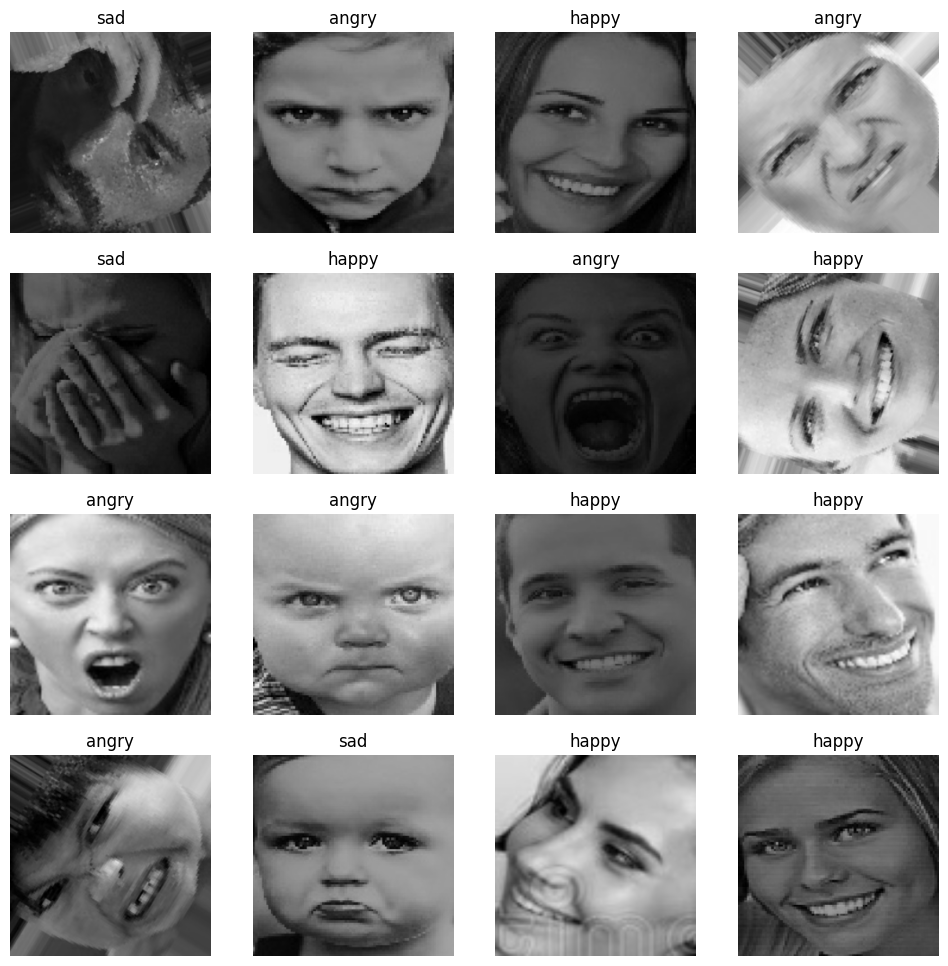

In [14]:
plt.figure(figsize=(12,12))
for images,labels in train_dataset.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i],axis=0).numpy()])
    plt.axis("off")

In [ ]:
0.025*360

9.0

## data set augmentation

In [15]:
##tf.keras.layer.augment
augment_layers=tf.keras.Sequential([
    RandomRotation(factor=(-0.025,0.025),),  #limiting to 9 degrees rotation not more than that, since 0.025.(if the angle was not limited then images are being upside down which is lading to poor performence)
    RandomFlip(mode='horizontal',),
    RandomContrast(factor=0.1),
])

In [16]:
def augment_layer(image,label):
  return augment_layers(image,training=True),label

## cut mix **augmentation**

In [17]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION["IM_SIZE"])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION["IM_SIZE"])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION["IM_SIZE"])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION["IM_SIZE"])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w


In [18]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(2,2)
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda)
  crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

  crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

  image = image_1 - pad_1 + pad_2

  lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]), dtype = tf.float32)
  label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

  return image, label


now dataset is ready for
# training data set preparation

In [19]:
train_dataset_1 = train_dataset.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [20]:
training_dataset = (
    mixed_dataset
    .map(cutmix, num_parallel_calls = tf.data.AUTOTUNE)
    # #.prefetch(tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


In [ ]:
# training_dataset=(
#     train_dataset
#     .map(augment_layer,num_parallel_calls=tf.data.AUTOTUNE)
#     .prefetch(tf.data.AUTOTUNE)
# )


In [21]:
validation_dataset=(
    val_dataset
    # # .prefetch(tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

In [22]:
resize_rescale_layers=tf.keras.Sequential([
    Resizing(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),Rescaling(1./255),
    ])

### **TF RECORDS**

In [ ]:
# validation_dataset=(
#     validation_dataset.unbatch()
#     # .prefetch(tf.data.AUTOTUNE)
# )

In [ ]:
# training_dataset=(
#     training_dataset.unbatch()
#     # .prefetch(tf.data.AUTOTUNE)
# )

### **MODELING AND TRAINING**
18:45

In [23]:
# modelling
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),  #input could be of any dim but in next line we r doing resizing

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 6)       168       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 6)      24        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 6)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)     

In [24]:
##TRAINING##

# since in train_dataset label mode is categorical
loss_function=CategoricalCrossentropy()
# loss_function=SparseCategoricalCrossentropy()


In [27]:
metrics=[CategoricalAccuracy(name="accuracy"),TopKCategoricalAccuracy(k=2,name="top_k_accuracy")]

In [28]:
lenet_model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
    loss=loss_function,
    metrics=metrics
)

In [29]:
# we set now to train
history=lenet_model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=CONFIGURATION["N_EPOCHS"],
    # epochs=5,
    verbose=1,
)

Epoch 1/20
213/213 [==============================] - 545s 3s/step - loss: 1.0492 - accuracy: 0.4939 - top_k_accuracy: 0.7881 - val_loss: 1.0306 - val_accuracy: 0.4723 - val_top_k_accuracy: 0.7805
Epoch 2/20
213/213 [==============================] - 571s 3s/step - loss: 0.9444 - accuracy: 0.5779 - top_k_accuracy: 0.8347 - val_loss: 0.9495 - val_accuracy: 0.5430 - val_top_k_accuracy: 0.8126
Epoch 3/20
213/213 [==============================] - 577s 3s/step - loss: 0.9022 - accuracy: 0.6099 - top_k_accuracy: 0.8519 - val_loss: 0.8415 - val_accuracy: 0.6067 - val_top_k_accuracy: 0.8705
Epoch 4/20
213/213 [==============================] - 515s 2s/step - loss: 0.8758 - accuracy: 0.6414 - top_k_accuracy: 0.8731 - val_loss: 0.9488 - val_accuracy: 0.5461 - val_top_k_accuracy: 0.8477
Epoch 5/20
213/213 [==============================] - 513s 2s/step - loss: 0.8422 - accuracy: 0.6532 - top_k_accuracy: 0.8867 - val_loss: 0.8091 - val_accuracy: 0.6422 - val_top_k_accuracy: 0.8652
Epoch 6/20
213/

In [32]:
lenet_model.save("lenet_most_best.h5")

In [34]:
lenet_model.load_weights("lenet_most_best.h5");

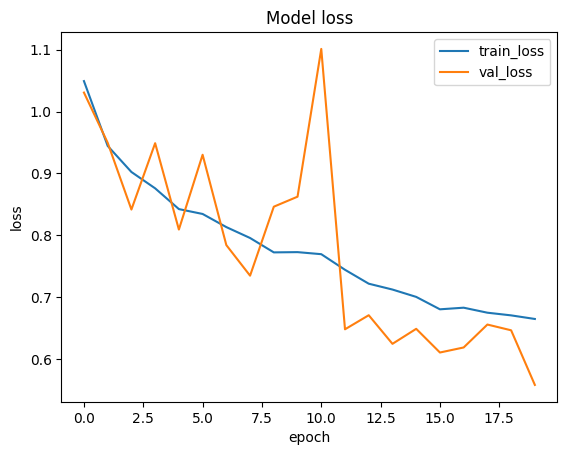

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])

plt.show()

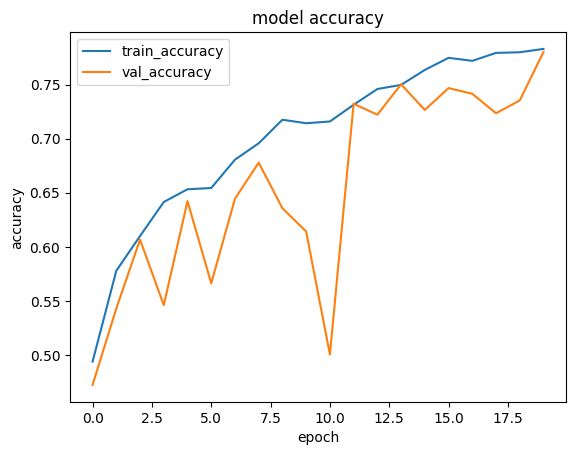

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy','val_accuracy'])
# legend() which is used to place a legend on the axis(like at a bottom side of the graph it (shows)names which line represents what)
plt.show()

In [ ]:
# evaluate model on our validation data

### *EVALUATION*

In [37]:
# gives loss,accuracy,top 2 k accuracy
lenet_model.evaluate(validation_dataset)

72/72 [==============================] - 43s 582ms/step - loss: 0.5579 - accuracy: 0.7801 - top_k_accuracy: 0.9254


[0.55785071849823, 0.7800702452659607, 0.9253731369972229]

## TESTING

In [38]:
# giving batch dim
test_image=cv2.imread("/content/dataset/Emotions Dataset/Emotions Dataset/test/happy/186327.jpg")
im=tf.constant(test_image,dtype=tf.float32)
im=tf.expand_dims(im,axis=0)
print(CLASS_NAMES[tf.argmax(lenet_model(im),axis=-1).numpy()[0]])

happy


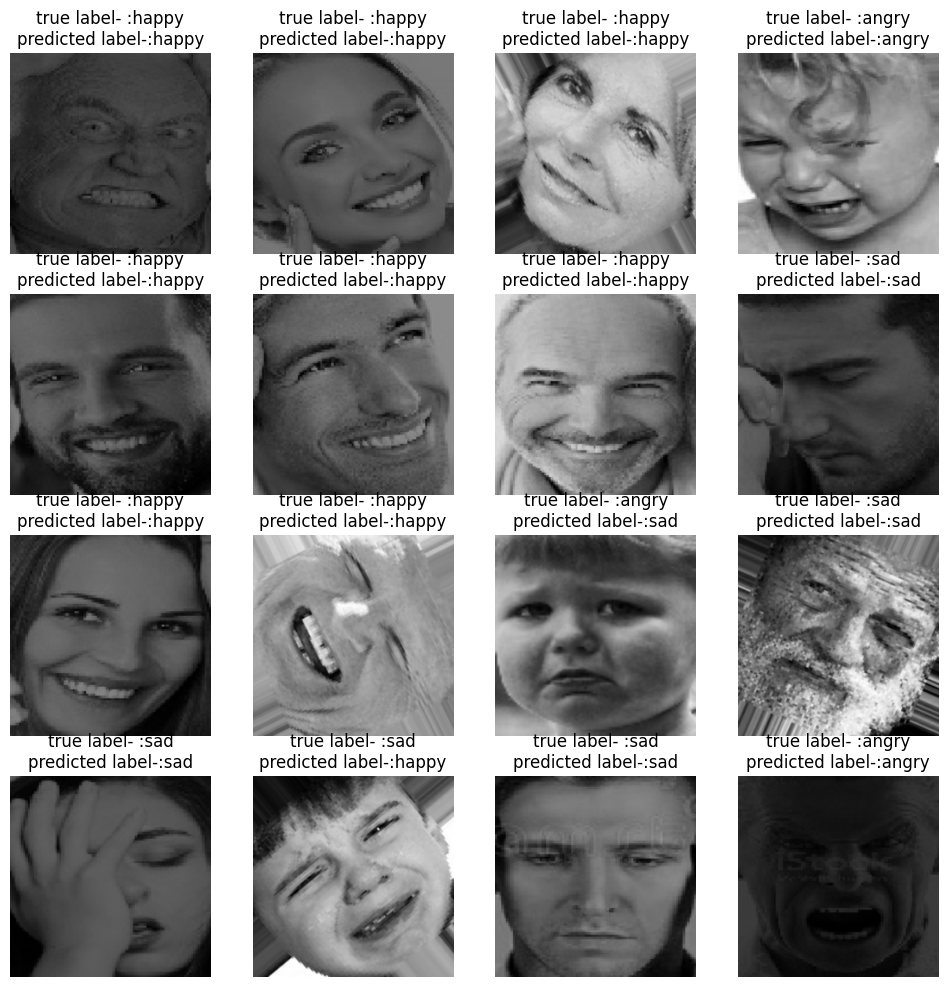

In [39]:
plt.figure(figsize=(12,12))
for images,labels in train_dataset.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255.)
    plt.title("true label- :"+CLASS_NAMES[tf.argmax(labels[i],axis=0).numpy()] +"\n" +"predicted label-:"+CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i],axis=0)),axis=-1).numpy()[0]])
    plt.axis("off")

confusion **matrix**

In [41]:
predicted=[]
labels=[]
for im,label in validation_dataset:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())
# .numpy() method is pretty much straightforward. It converts a tensor object into an numpy.ndarray object. This implicitly means that the converted tensor will be now processed on the CPU

In [43]:
print(np.concatenate([np.argmax(labels[:-1],axis=-1).flatten(),np.argmax(labels[-1],axis=-1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1],axis=-1).flatten(),np.argmax(predicted[-1],axis=-1).flatten()]))


[1 1 0 ... 0 2 2]
[1 1 0 ... 0 0 2]


In [42]:
pred=np.concatenate([np.argmax(predicted[:-1],axis=-1).flatten(),np.argmax(predicted[-1],axis=-1).flatten()]) #to not consider last batch we keep [:-1] since if we have total 98 items having given batch size as 32 then 32*3=96 and remaing 3 items in other batch so skip that and againn we will concat that which havi 2 elements after flatening it seperately
lab=np.concatenate([np.argmax(labels[:-1],axis=-1).flatten(),np.argmax(labels[-1],axis=-1).flatten()])

### **CONFUSION MATRIX**

[[343  80  92]
 [ 38 851 117]
 [ 59 115 583]]


Text(0.5, 58.7222222222222, 'predicted')

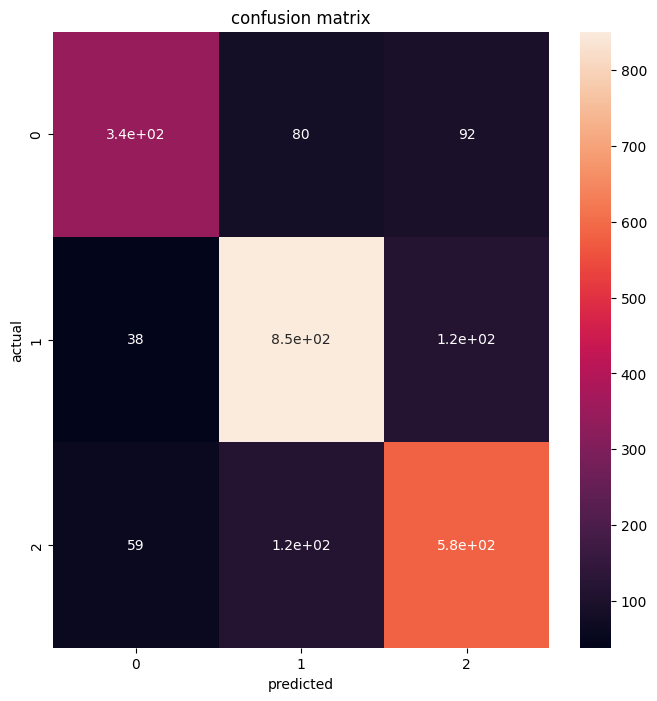

In [44]:
cm=confusion_matrix(lab,pred)
print(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,)
plt.title('confusion matrix')
plt.ylabel("actual")
plt.xlabel('predicted')

<Axes: >

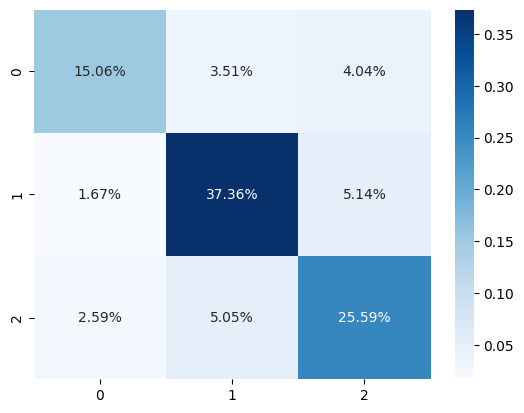

In [45]:
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap="Blues")

DATA AUGMENTATION
can be done by using tensor or automatically by keras layer

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [ ]:
import tensorflow as tf
import seaborn as sn
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = train_datagen.flow_from_directory('/content/dataset/Emotions Dataset/Emotions Dataset/train', target_size = (48, 48), batch_size = 64, color_mode = 'rgb', class_mode = 'categorical')
test = test_datagen.flow_from_directory('/content/dataset/Emotions Dataset/Emotions Dataset/test', target_size = (48, 48), batch_size = 64, color_mode = 'rgb', class_mode = 'categorical')
# train_directory="/content/dataset/Emotions Dataset/Emotions Dataset/train"
# # validation_directory="/content/dataset/Emotions Dataset/Emotions Dataset/test"
# val_directory="/content/dataset/Emotions Dataset/Emotions Dataset/test"

Found 6799 images belonging to 3 classes.
Found 2278 images belonging to 3 classes.


In [ ]:
def create_model(resnet, dense_nodes, drop, activation):
    return Sequential([
        resnet,
        Flatten(),
        Dense(dense_nodes, activation = 'relu'),
        Dropout(drop),
        Dense(7, activation = activation)
    ])

In [ ]:
def compile_and_train_model(model, epochs, lr):
    adam = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train, validation_data = test, epochs = epochs)

    return history

In [ ]:
def evaluate_model(model, history, test):
    print("Accuracy of our model on validation data : " , model.evaluate(test)[1]*100 , "%")
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def performance_metrics(model, test):
    y_pred = model.predict(test)
    y_result = []
    for p in y_pred:
        y_result.append(np.argmax(p))

    y_actual = []
    for i in range(len(test)):
        for p in test[i][1]:
            y_actual.append(np.argmax(p))

    print(classification_report(y_actual, y_result))

    cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

    plt.figure(figsize = (10, 7))
    sn.heatmap(cm, annot = True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [ ]:
def test_resnet(resnet, dense_nodes, drop, activation, epochs, lr):
    model = create_model(resnet50, dense_nodes, drop, activation)
    model.summary()

    history = compile_and_train_model(model, epochs, lr)

    evaluate_model(model, history, test)

    performance_metrics(model, test)

In [ ]:
# resnet50 = keras.applications.ResNet50(include_top = False, input_shape = (48, 48, 3), weights = 'imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# dense_nodes = 256
# drop = 0.4
# activation = 'softmax'
# epochs = 40
# lr = 0.0001

# test_resnet(resnet50, dense_nodes, drop, activation, epochs, lr)

In [ ]:
# resnet101 = keras.applications.ResNet101(include_top = False, input_shape = (48, 48, 3), weights = 'imagenet', pooling = 'max')

In [ ]:
# dense_nodes = 256
# drop = 0.4
# activation = 'softmax'
# epochs = 40
# lr = 0.0001

# test_resnet(resnet101, dense_nodes, drop, activation, epochs, lr)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/dataset/Emotions Dataset/Emotions Dataset/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 5440 images belonging to 3 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/dataset/Emotions Dataset/Emotions Dataset/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 455 images belonging to 3 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/dataset/Emotions Dataset/Emotions Dataset/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 2278 images belonging to 3 classes.


In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet")

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [ ]:
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 512)         0         
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 32)                16416     
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                      

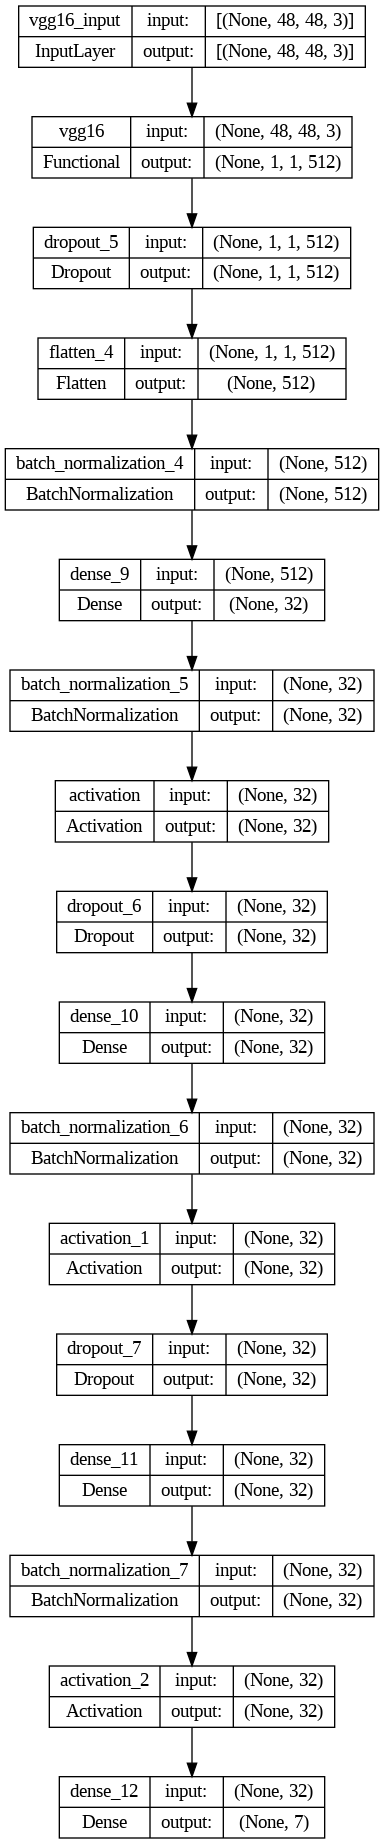

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 5,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/5


InvalidArgumentError: ignored